In [52]:
import pandas as pd
import glob,os
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import pyfpgrowth

In [53]:
df = pd.read_csv('filtered.tsv',delimiter='\t')

In [54]:
pd.set_option('max_colwidth',100)

In [55]:
df.columns

Index(['Borough', 'Event Type', 'Audience', 'Attendance', 'Class'], dtype='object')

In [56]:
df.head()

,Borough,Event Type,Audience,Attendance,Class
0,Queens,Local Event,General Public,1200.0,Play
1,Queens,Local Event,General Public,600.0,Play
2,Queens,Local Event,General Public,400.0,Play
3,Queens,Local Event,General Public,250.0,Play
4,Queens,Local Event,General Public,190.0,Play


In [57]:
df[df.isna().any(axis=1)]

,Borough,Event Type,Audience,Attendance,Class
605,Manhattan,Community Based Event,General Public,NaN,Other
610,Manhattan,Community Based Event,General Public,NaN,Other
633,Brooklyn,Tournament/Competition,"Teens,Young Adult",NaN,Sport
789,Manhattan,Community Based Event,General Public,NaN,Lecture/Panel/Talk
792,Staten Island,Community Based Event,General Public,NaN,Sport
793,Staten Island,Community Based Event,General Public,NaN,Sport
1023,Manhattan,Community Based Event,"Children,Tot,Young Adult,Adults,Teens,Seniors,Adaptive,General Public",NaN,Play


In [58]:
df=df.dropna()

In [59]:
pro = list(set(df['Borough']))
cla = list(set(df['Class']))

In [80]:
', '.join(sorted(cla))

'AC&F, Awards, Dance, Fitness, Lecture/Panel/Talk, M.U.T.S, Movies, Music, Other, Play, Sport'

In [68]:
list_audience = []
list_count = []
for i in pro:
    p = df[df['Borough']==i]['Attendance']
    list_count.append(p.count())
    list_audience.append(p.sum()/p.count())

In [69]:
pro,list_audience

(['Staten Island', 'Queens', 'Manhattan', 'Bronx', 'Brooklyn'],
 [77.29245283018868,
  197.09937888198758,
  140.0940366972477,
  75.00456621004567,
  185.04132231404958])

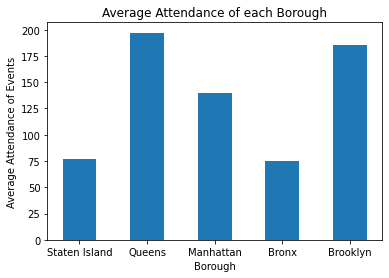

<Figure size 1440x1440 with 0 Axes>

In [71]:
fig, ax = plt.subplots()
plt.figure(figsize=(20, 20))
ax.bar(pro,list_audience, width=0.5)
ax.set_ylabel('Average Attendance of Events')
ax.set_xlabel('Borough')
ax.set_title('Average Attendance of each Borough')
plt.show()

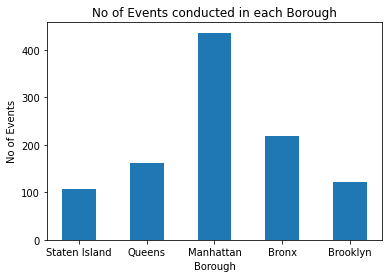

<Figure size 1440x1440 with 0 Axes>

In [72]:
fig, ax = plt.subplots()
plt.figure(figsize=(20, 20))
ax.bar(pro,list_count, width=0.5)
ax.set_ylabel('No of Events')
ax.set_xlabel('Borough')
ax.set_title('No of Events conducted in each Borough')
plt.show()

In [73]:
pro

['Staten Island', 'Queens', 'Manhattan', 'Bronx', 'Brooklyn']

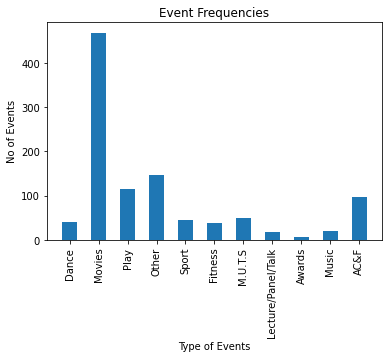

<Figure size 1440x1440 with 0 Axes>

In [104]:
list_count = [df[df['Class']==i]['Class'].count() for i in cla]

fig, ax = plt.subplots()
x = np.arange(len(cla))
plt.figure(figsize=(20, 20))
ax.bar(x,list_count, width=0.5, align='center')
ax.set_ylabel('No of Events')
ax.set_xlabel('Type of Events')
ax.set_title('Event Frequencies')
ax.set_xticks(x)
ax.set_xticklabels(cla)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')
plt.show()

In [74]:
list_audience = {i:[] for i in pro}
list_count = {i:[] for i in pro}
for i in pro:
    for j in cla:
        p=df[(df['Borough']==i)&(df['Class']==j)]['Attendance']
        list_count[i].append(p.count())
        if p.count()==0:
            list_audience[i].append(0)
        else:
            list_audience[i].append(p.sum()/p.count())

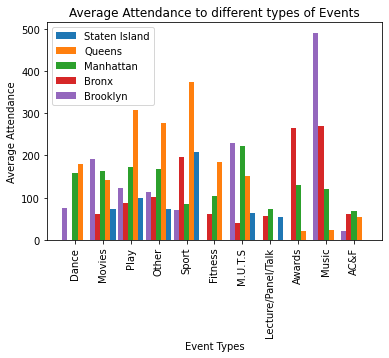

<Figure size 5760x2880 with 0 Axes>

In [81]:
x = np.arange(len(cla))*2.2
width = 2
fig, ax = plt.subplots()
plt.figure(figsize=(80, 40))
rect = []
for i in range(-2,3):
    rect.append(ax.bar(x - (i*width)/5, list_audience[pro[i+2]], width/5, label=pro[i+2],align='center'))

ax.set_ylabel('Average Attendance')
ax.set_xlabel('Event Types')
ax.set_title('Average Attendance to different types of Events')
ax.set_xticks(x)
ax.set_xticklabels(cla)
ax.legend()
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')

# fig.tight_layout()
plt.show()

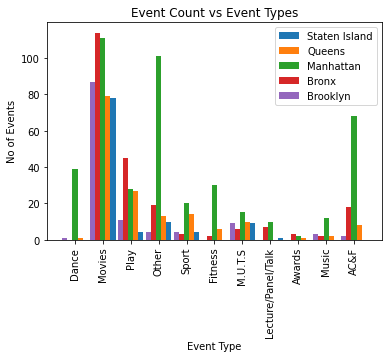

<Figure size 5760x2880 with 0 Axes>

In [82]:
x = np.arange(len(cla))*2.2
width = 2
fig, ax = plt.subplots()
plt.figure(figsize=(80, 40))
rect = []
for i in range(-2,3):
    rect.append(ax.bar(x - (i*width)/5, list_count[pro[i+2]], width/5, label=pro[i+2],align='center'))

ax.set_ylabel('No of Events')
ax.set_xlabel('Event Type')
ax.set_title('Event Count vs Event Types')
ax.set_xticks(x)
ax.set_xticklabels(cla)
ax.legend()
plt.setp(ax.get_xticklabels(), fontsize=10, rotation='vertical')

# fig.tight_layout()
plt.show()

In [17]:
s=set()
for i in df['Audience']:
    s=s.union(set(i.split(',')))
print(s)
s.remove('General Public')
s.remove('Adaptive')
s=list(s)
print(s)

{'Young Adult', 'Seniors', 'Tot', 'Children', 'Adaptive', 'Teens', 'General Public', 'Adults'}
['Young Adult', 'Seniors', 'Tot', 'Children', 'Teens', 'Adults']


In [18]:
transactions = []
for i in range(len(df)):
    transactions.append([df.iloc[i]['Class']])
    p = df.iloc[i]['Audience'].split(',')
    if 'General Public' in p:
        p.remove('General Public')
        p.extend(s)
    if 'Adaptive' in p:
        p.remove('Adaptive')
    p=list(set(p))
    transactions[i].extend(p)

transactions = [sorted(i) for i in transactions if len(i)>1]
print(len(transactions))

1042


In [105]:
patterns = pyfpgrowth.find_frequent_patterns(transactions, 100)

In [107]:
patterns

{('Play',): 115,
 ('Children', 'Play'): 106,
 ('Other', 'Tot'): 104,
 ('Children', 'Other', 'Tot'): 102,
 ('Other', 'Seniors', 'Young Adult'): 102,
 ('Adults', 'Other', 'Seniors', 'Young Adult'): 101,
 ('Other', 'Seniors', 'Teens'): 102,
 ('Adults', 'Other', 'Seniors', 'Teens'): 102,
 ('Adults', 'Other', 'Seniors'): 107,
 ('Children', 'Other', 'Young Adult'): 105,
 ('Children', 'Other', 'Teens', 'Young Adult'): 101,
 ('Adults', 'Children', 'Other', 'Young Adult'): 100,
 ('Adults', 'Children', 'Other', 'Teens', 'Young Adult'): 100,
 ('Adults', 'Other', 'Young Adult'): 106,
 ('Other', 'Teens', 'Young Adult'): 106,
 ('Adults', 'Other', 'Teens', 'Young Adult'): 103,
 ('Adults', 'Other'): 115,
 ('Adults', 'Children', 'Other'): 100,
 ('Adults', 'Other', 'Teens'): 106,
 ('Adults', 'Children', 'Other', 'Teens'): 100,
 ('Children', 'Other'): 120,
 ('Children', 'Other', 'Teens'): 108,
 ('Other', 'Teens'): 121,
 ('Movies', 'Young Adult'): 466,
 ('Adults', 'Movies', 'Young Adult'): 466,
 ('Movies'

In [108]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.3)

In [113]:
keys = [key for key in rules.keys() if any([val in cla for val in key])]

In [117]:
{i: rules[i] for i in keys}

{('Play',): (('Children',), 0.9217391304347826),
 ('Children', 'Other'): (('Teens',), 0.9),
 ('Other', 'Tot'): (('Children',), 0.9807692307692307),
 ('Adults', 'Other'): (('Children', 'Teens'), 0.8695652173913043),
 ('Adults', 'Other', 'Seniors'): (('Teens',), 0.9532710280373832),
 ('Adults', 'Other', 'Young Adult'): (('Teens',), 0.9716981132075472),
 ('Other', 'Seniors', 'Young Adult'): (('Adults',), 0.9901960784313726),
 ('Other', 'Teens'): (('Children',), 0.8925619834710744),
 ('Adults', 'Other', 'Teens'): (('Children',), 0.9433962264150944),
 ('Other', 'Seniors', 'Teens'): (('Adults',), 1.0),
 ('Children', 'Other', 'Teens'): (('Adults',), 0.9259259259259259),
 ('Children', 'Other', 'Young Adult'): (('Adults', 'Teens'),
  0.9523809523809523),
 ('Other', 'Teens', 'Young Adult'): (('Adults',), 0.9716981132075472),
 ('Adults', 'Children', 'Other'): (('Teens',), 1.0),
 ('Adults', 'Children', 'Other', 'Teens'): (('Young Adult',), 1.0),
 ('Adults', 'Children', 'Other', 'Young Adult'): (('

In [23]:
# df['Audience']=[','.join([j.strip(' ;')for j in i.split('#')]) for i in list(df['Audience'])]

In [24]:
# s = set()
# for i in range(len(df)):
#     s.add((df.iloc[i]['Classification'],df.iloc[i]['Category']))

In [25]:
# d

In [26]:
# d = {i: i[0] for i in s}

In [27]:
# d[('Academics', 'Arts/Culture')]='AC&F'
# d[('Aquatics', 'Fitness')]='Sport'
# d[('Aquatics', 'Sport')]='Sport'
# d[('Tier 1', 'Sport')]='Sport'
# d[('Tier 2', 'Fitness')]='Sport'
# d[('Tier 2', 'Sport')]='Sport'
# d[('Tier 3', 'Sport')]='Sport'

In [28]:
# df=df.drop(columns=['Unit','Group Name/Partner','Date and Time','LocationType','Location','Event Name'])

In [29]:
# l = [d[(df.iloc[i]['Classification'],df.iloc[i]['Category'])] for i in range(len(df))]

In [30]:
# l=[i if i==i else 'Other' for i in l]

In [31]:
# df['Class']=l

In [32]:
# df=df.drop(columns=['Category','Classification'])

In [33]:
# for i in range(len(df)):
#     d[df.iloc[i]['Borough']][df.iloc[i]['Class']][0]+=df.iloc[i]['Attendance']
#     d[df.iloc[i]['Borough']][df.iloc[i]['Class']][1]+=1

In [34]:
# pth = '../Documents/8/DM/proj/'
# for i in s:
#     df1[df1['Borough']==i].iloc[:,6:].to_csv(pth+i+'.tsv',sep='\t',index=False)

In [35]:
# s

In [36]:
# s=set(df1['Borough'])

In [37]:
# set(df1['Category'])

In [38]:
# df1 = df1.dropna()

In [39]:
# set(df1[df1.isna().any(axis=1)]['Classification'])

In [40]:
# df1['Classification']=df1['Classification'].fillna('other')

In [41]:
# df1 = df.drop(columns=['Group Name/Partner'])

In [42]:
# s1 = {'General Public','Adults','Children','Seniors','Teens'}
# c = 0
# for i in l:
#     for j in s1:
#         if j in i:
#             c+=1
#             break
# c

In [43]:
# s

In [44]:
# s = set()
# for i in l:
#     for j in i:
#         s.add(j)

In [45]:
# l = df['Audience']
# l = [i.split(',') for i in l]

In [46]:
# df.to_csv('filtered.tsv',sep='\t',index=False)